### OpenCV를 활용해서 Fourier Transform

In [1]:
import cv2
import json
from glob import glob
from PIL import Image
import numpy as np
import os
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

* train

In [3]:
img_path = '/workspace/yolo_RoI_re/train'

In [4]:
for top, dir, f in os.walk(img_path):
    for filename in f:
        url = os.path.join(top,filename)
        sp = url.split('/')
        img = cv2.imread(url, 0)
        break

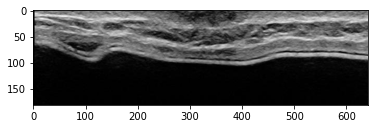

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

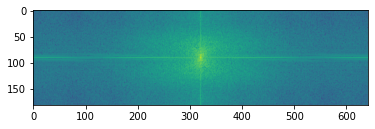

In [8]:
plt.imshow(magnitude_spectrum)

In [6]:
rows,cols = img.shape
crow,ccol = round(rows/2), round(cols/2)

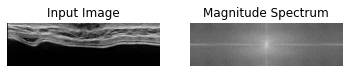

In [13]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

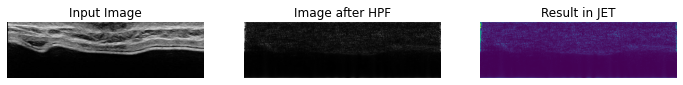

In [14]:
rows,cols = img.shape
# 소수점으로 떨어지는 것을 방지하기 위함 : round
crow,ccol = round(rows/2), round(cols/2)

# 60x60 크기로 창 만들기
fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(132),plt.imshow(img_back,cmap='gray')
plt.title("Image after HPF"), plt.axis('off')
plt.subplot(133),plt.imshow(img_back)
plt.title("Result in JET"), plt.axis('off')
plt.show()

In [27]:
img.shape

(181, 642)

In [28]:
img_back.shape

(181, 642)

In [31]:
np.min(img_back)

0.0013008603103066433

In [32]:
np.max(img_back)

114.4836988248201

In [37]:
for top, dir, f in os.walk(img_path):
    for filename in f:
        url = os.path.join(top,filename)
        sp = url.split('/')
        img = cv2.imread(url, 0)
        # fourier 
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        rows,cols = img.shape
        # 소수점으로 떨어지는 것을 방지하기 위함 : round
        crow,ccol = round(rows/2), round(cols/2)

        # 60x60 크기로 창 만들기
        fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        break

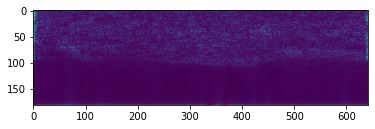

In [38]:
plt.imshow(img_back)

In [40]:
img_back

array([[49.86352709, 43.85044418, 47.34439148, ..., 37.61720381,
        26.97195708, 33.40630352],
       [63.92696493, 63.32578434, 63.79106206, ..., 13.17583025,
        18.49187858, 26.02681721],
       [63.05653327, 66.37652701, 65.920814  , ...,  5.49631042,
        30.1122257 , 37.91825318],
       ...,
       [ 6.21394946,  6.51619122,  6.96791797, ...,  5.67026758,
         5.64222189,  5.91537257],
       [ 4.09584289,  4.35005244,  4.53560732, ...,  4.07550155,
         3.79479925,  3.89942679],
       [20.25314975, 20.87594395, 20.67890019, ..., 17.47526012,
        18.52778677, 18.84080939]])

In [47]:
for top, dir, f in os.walk(img_path):
    for filename in f:
        url = os.path.join(top,filename)
        sp = url.split('/')
        img = cv2.imread(url, 0)
        # fourier 
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        rows,cols = img.shape
        # 소수점으로 떨어지는 것을 방지하기 위함 : round
        crow,ccol = round(rows/2), round(cols/2)

        # 60x60 크기로 창 만들기
        fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        
        save_path ='/workspace/ft/train/' +sp[4]
        save_img_path = '/workspace/ft/train/' + '/'.join(sp[4:])
        

        if not os.path.isdir(save_path):
                os.makedirs(save_path)
        
        try:
            ft_img = cv2.imwrite(save_img_path, img_back)
        except:
            print(save_img_path)

* valid crop

In [48]:
img_path = '/workspace/yolo_RoI_re/valid'

In [49]:
for top, dir, f in os.walk(img_path):
    for filename in f:
        url = os.path.join(top,filename)
        sp = url.split('/')
        img = cv2.imread(url, 0)
        # fourier 
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        rows,cols = img.shape
        # 소수점으로 떨어지는 것을 방지하기 위함 : round
        crow,ccol = round(rows/2), round(cols/2)

        # 60x60 크기로 창 만들기
        fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        
        save_path ='/workspace/ft/valid/' +sp[4]
        save_img_path = '/workspace/ft/valid/' + '/'.join(sp[4:])
        

        if not os.path.isdir(save_path):
                os.makedirs(save_path)
        
        try:
            ft_img = cv2.imwrite(save_img_path, img_back)
        except:
            print(save_img_path)

* test crop

In [50]:
img_path = '/workspace/yolo_RoI_re/test'

In [51]:
for top, dir, f in os.walk(img_path):
    for filename in f:
        url = os.path.join(top,filename)
        sp = url.split('/')
        img = cv2.imread(url, 0)
        # fourier 
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        rows,cols = img.shape
        # 소수점으로 떨어지는 것을 방지하기 위함 : round
        crow,ccol = round(rows/2), round(cols/2)

        # 60x60 크기로 창 만들기
        fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        
        save_path ='/workspace/ft/test/' +sp[4]
        save_img_path = '/workspace/ft/test/' + '/'.join(sp[4:])
        

        if not os.path.isdir(save_path):
                os.makedirs(save_path)
        
        try:
            ft_img = cv2.imwrite(save_img_path, img_back)
        except:
            print(save_img_path)